# Cluster Analysis

#### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pylab as plt 
import matplotlib.colors
import matplotlib.cm as cm
import seaborn as sns 
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Set random seed variable for code reproducibility
SEED = 0
# Set the number of threads to avoid kmeans thread warning
os.environ['OMP_NUM_THREADS'] = '1'

### Example 1: Lecture

**Calculate distance between Homer and Mr. Burns**

Example 1:
Homer: Age = 68, Income = $50,000 and # of Credit Cards = 5
Mr. Burns: Age = 97, Income = 1,000,000 and # of Credit Cards = 0

Example 2:
Homer: Age = 68, Years at Power Plant = 30 and Actual Work Hours = 15
Mr. Burns: Age = 97, Years at Power Plant = 36 and Actual Work Hours = 0

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

Example 1: d(Homer, Mr. Burns): 950000
Example 2: d(Homer, Mr. Burns): 33


**Create a dataframe for the Simpsons characters**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

In [3]:
data = {
    "Age": [0.694, 0.50, 0.582, 0.714, 0.418, 0.296],
    "Income": [0.05, 0.04, 0.054, 0.062, 0.035, 0.026]
}
index = ["Homer", "Seymour", "Lenny", "Carl", "Edna", "Otto"]
df = pd.DataFrame(data, index=index)
df

,Age,Income
Homer,0.694,0.050
Seymour,0.500,0.040
Lenny,0.582,0.054
Carl,0.714,0.062
Edna,0.418,0.035
Otto,0.296,0.026


**Display centroids for each iteration**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

iter: 1 - first: [0.449   0.03875], second: [0.704 0.056]
iter: 2 - first: [0.40466667 0.03366667], second: [0.66333333 0.05533333]
iter: 3 - first: [0.40466667 0.03366667], second: [0.66333333 0.05533333]


**Run cluster analysis**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

Number of iterations: 3


,Age,Income,Cluster
Homer,0.694,0.050,1
Seymour,0.500,0.040,0
Lenny,0.582,0.054,1
Carl,0.714,0.062,1
Edna,0.418,0.035,0
Otto,0.296,0.026,0


### 15.2 Pharmaceutical Industry.

An equities analyst is studying the pharmaceutical industry and would like your help in exploring and
understanding the financial data collected by her firm. Her main objective is to understand the structure of the pharmaceutical industry using some basic financial measures.

Financial data gathered on 21 firms in the pharmaceutical industry are available in the file _Pharmaceuticals.csv_. For each firm, the following variables are recorded:

1. Market capitalization (in billions of dollars)
2. Beta
3. Price/earnings ratio
4. Return on equity
5. Return on assets
6. Asset turnover
7. Leverage
8. Estimated revenue growth
9. Net profit margin
10. Median recommendation (across major brokerages)
11. Location of firm's headquarters
12. Stock exchange on which the firm is listed

Use cluster analysis to explore and analyze the given dataset.

**Read in data from `Pharmaceuticals.csv` file.**

Set the Symbol as the index.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Symbol,,,,,,,,,,,,,
ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


**Drop the Name, Median_Recommendation, Location, and Exchange columns.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
AGN,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
AHM,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
AZN,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
AVE,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9


**Normalize the data.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205
AGN,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035
AHM,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953
AZN,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900
AVE,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490


#### Evaluate Different Values of k.

Helper function provided to create an elbow chart.

In [9]:
def create_elbow_chart(range_n_clusters, params, data):
    inertia = []   
    for n_clusters in range_n_clusters: 
        kmeans = KMeans(n_clusters=n_clusters, 
                        init=params['init'], 
                        max_iter=params['max_iter'], 
                        n_init=params['n_init'], 
                        random_state=SEED).fit(data) 
        # Average SS per cluster
        inertia.append(kmeans.inertia_ / n_clusters) 
    inertias = pd.DataFrame({'n_clusters': range_n_clusters, 'inertia': inertia}) 
    ax = inertias.plot(x='n_clusters', y='inertia')
    plt.xlabel('Number of clusters (k)') 
    plt.ylabel('Average Within-Cluster Squared Distances') 
    plt.ylim((0, 1.1 * inertias.inertia.max())) 
    ax.legend().set_visible(False)
    return inertias

**Create Elbow Chart**

Go to the documentation page for kMeans [here](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) and review the options and default values for:

- init
- n_init
- max_iter

Experiment with different parameters and observe how initial centroid placement impacts the output.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

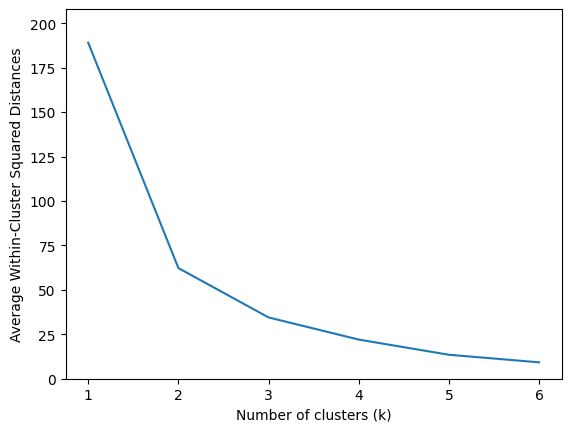

**Plot Silhouette Scores**

Helper function provided.

In [11]:
def plot_silhouette_scores(range_n_clusters, params, data):
    silhouette_scores = []  
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, 
                        init=params['init'], 
                        max_iter=params['max_iter'], 
                        n_init=params['n_init'], 
                        random_state=SEED).fit(data) 
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)       
    plt.plot(range_n_clusters, silhouette_scores)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel("Avg Silhouette Score")

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

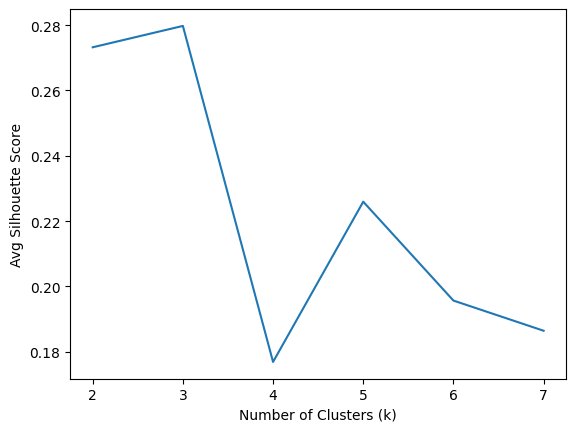

**Create Profile Plot**

Helper function provided to create a profile plot.

In [13]:
def create_profile_chart(params, data, ax):
    kmeans = KMeans(n_clusters=params['k'],
                    init=params['init'], 
                    max_iter=params['max_iter'], 
                    n_init=params['n_init'], 
                    random_state=SEED).fit(data) 
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
    centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
    parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5, ax=ax)
    plt.xlim(-0.5,len(data.columns)-0.5)
    plt.legend(loc='best')

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

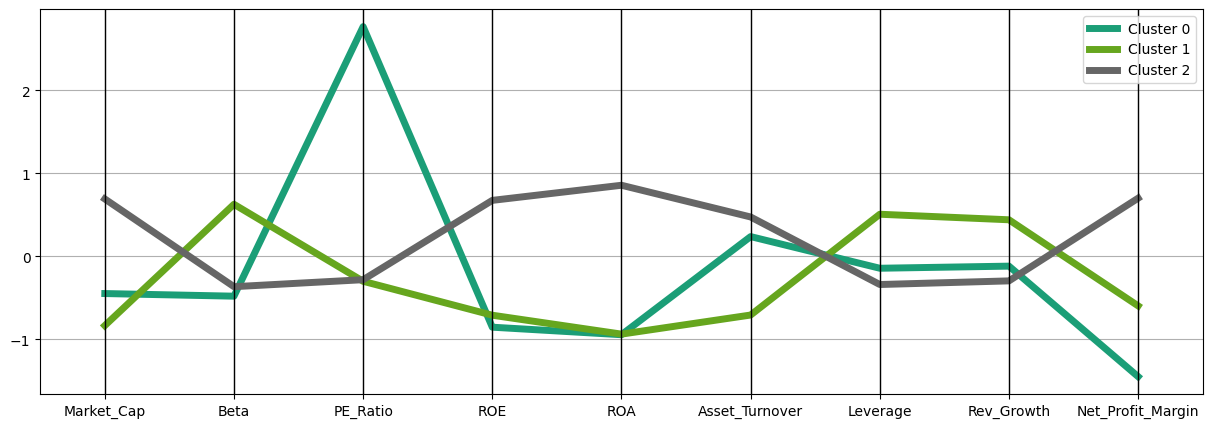

**Use PCA to Visualize Clusters**

Principal Component Analysis (PCA) is a powerful technique that helps visualize high-dimensional data by reducing it to 2D or 3D representations while preserving as much variance as possible. When performing k-Means clustering, PCA can be used to project the clustered data into a lower-dimensional space, making it easier to see patterns and assess the effectiveness of the clustering.

By applying PCA, we can:
- Observe Cluster Separation – Determine if clusters are well-separated or overlapping.
- Validate the Number of Clusters – Identify if the chosen K value aligns with natural groupings in the data.
- Improve Interpretability – Understand how data points relate to each other in reduced dimensions.

While PCA simplifies visualization, it should be used with caution as some information may be lost in dimensionality reduction.

Helper function provided to create a profile plot.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [15]:
def visualize_clusters_pca(params, data):
    kmeans = KMeans(n_clusters=params['k'],
                    init=params['init'], 
                    max_iter=params['max_iter'], 
                    n_init=params['n_init'], 
                    random_state=SEED).fit(data) 
    
    cluster_assignments = kmeans.fit_predict(data)
    
    colors = cm.Set1(np.linspace(0, 1, params['k']))
    cmap = matplotlib.colors.ListedColormap(colors)
    
    pca = PCA(n_components=2)
    pc1, pc2 = zip(*pca.fit_transform(data))
    plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

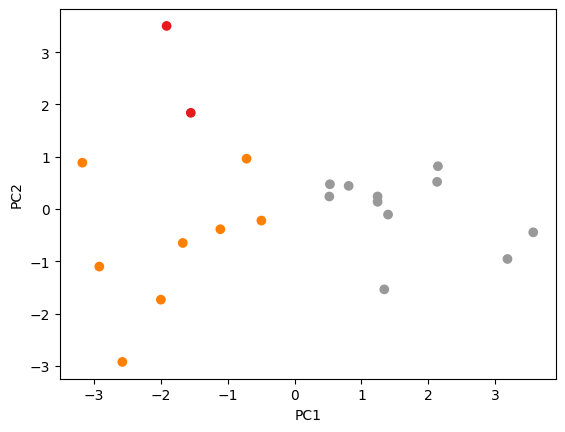

Two factors can help us decide how many clusters to form:

1. The purpose of the inquiry. How many clusters are we going to want to 
   deal with?
   In this case, to understand the structure of the industry in financial 
   terms we might use basic domain knowledge to consider that size and 
   financial performance are fundamental dimensions into which our various 
   metrics fall. To make sense of our analysis, we will need at least two 
   clusters, but more than 3 or 4 will probably defeat the purpose of 
   clustering, which is to simplify matters (at least for the purposes of
   initial analysis).

2. How do the clusters look when trying 2, 3, 4, 5 clusters? Are they nicely 
   separated? Do they have enough members to be useful? Do they look like
   natural clusters (as opposed to arbitrary decisions about cluster 
   membership)?
   Normalizing the data is important to ensure that the "distance measured" 
   accords equal weight to each variable. Without normalization, the variable
   with the largest scale will dominate the measure. 

### 15.2.b
Interpret the clusters with respect to the variables used in forming the clusters.

**Be sure to rerun k-means model for the final desired parameters.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Cluster 0,31.91,0.40,69.50,13.20,5.60,0.75,0.48,12.08,6.40
Cluster 1,9.83,0.68,20.65,15.32,5.64,0.55,0.97,18.10,11.86
Cluster 2,97.11,0.43,20.95,35.70,14.95,0.80,0.33,10.16,20.17


Some observations are big companies, profitable, lower debit, and lower growth. Contrary, there are mid-sized companies with stronger price-earnings but not as porfitable. Finally, small companies that have strong revenue growth and heavily leveraged.

### 15.2.c
Is there a pattern in the clusters with respect to the numerical variables (10-12)? (those not used in forming the clusters).

- Median_Recommendation
- Location
- Exchange

Helper function provided to create a profile plot.

In [18]:
def summarize_cat_col(col):
    return pd.DataFrame(pd.Series(item[col].value_counts(), name=f'Cluster {key}') 
                        for key, item in pharma_df.groupby(cluster_assignments))

<h4 style="color:blue"> Write Your Code Below: </h4>

**Median_Recommendation**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

Median_Recommendation,Moderate Buy,Hold,Moderate Sell,Strong Buy
Cluster 0,1.0,1.0,NaN,NaN
Cluster 1,3.0,2.0,2.0,1.0
Cluster 2,3.0,6.0,2.0,NaN


With respect to buy/hold recommendations, some clusters are interesting characterized by mixed recommendations for each ranging from "moderate sell" to "strong buy".

**Location**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

Location,CANADA,US,UK,FRANCE,GERMANY,IRELAND,SWITZERLAND
Cluster 0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
Cluster 1,NaN,4.0,1.0,1.0,1.0,1.0,NaN
Cluster 2,NaN,8.0,2.0,NaN,NaN,NaN,1.0


With respect to country, the various countries are fairly well spread out across the 4 clusters, though cluster 2 has 5 US firms.

**Exchange**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

Exchange,NYSE,NASDAQ,AMEX
Cluster 0,2.0,NaN,NaN
Cluster 1,6.0,1.0,1.0
Cluster 2,11.0,NaN,NaN


With respect to exchange, there are only two non-NYSE firms in the data set, and they are in the same cluster, one of the "small firms" cluster. (This is 
consistent with the nature of the AMEX and NASDAQ, which typically host smaller firms than the NYSE.)

### 15.2.d
Provide an appropriate name for each cluster using any or all of the variables in the dataset.

This step can vary based on the number of clusters used. Some potential names are:

- The big boys, financial stars
- International establishment with decent financial performance.
- Slow growth mid-size
- Fast growth small-cap

# Problem 15.4: Marketing to Frequent Fliers

The file _EastWestAirlinesCluster.csv_ contains information on 3999 passengers who belong to an airline's frequent flier program. For each passenger, the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

**Load orders data and display first 5 rows.**

Use the ID# column as the index

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


**Normalize the data and display first 5 rows.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


#### Evaluate Different Values of k

**Elbow Chart**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

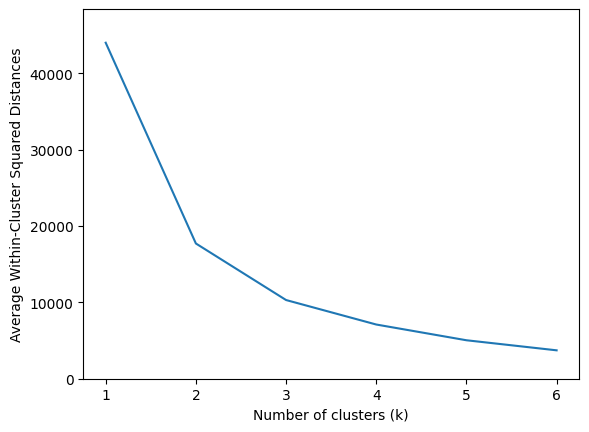

**Plot Silhouette Scores**

Experiment with different init paramaters to view the varying results.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

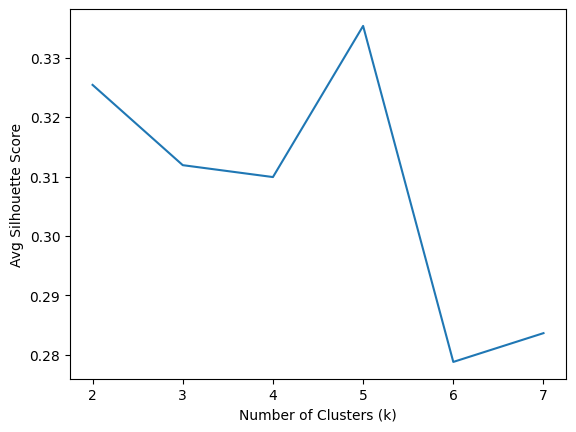

**Profile Plot**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

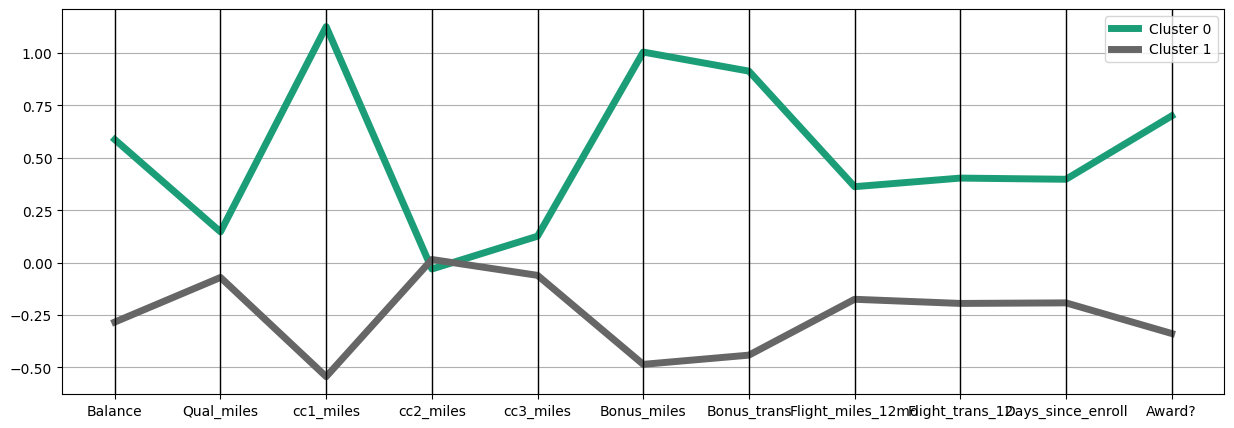

**Use PCA to Visualize Clusters**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

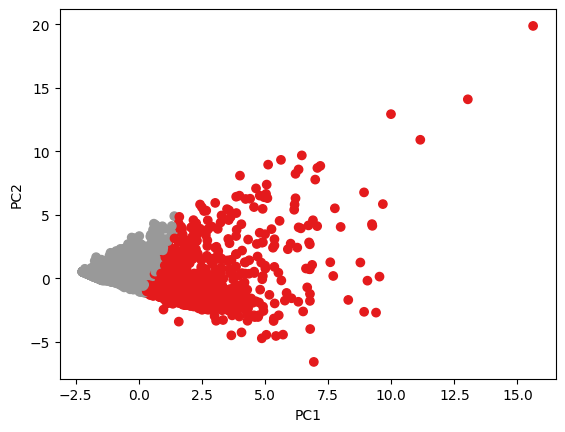

### 15.4.f

Which clusters would you target for offers, and what types of offers would you target to customers in that cluster?

For the "minimal, non-frequent" flyers, two types of offers might be used.
1. Offers to liquidate the mileage, to remove it as a liability (e.g., offers to purchase magazine subscriptions)
2. Offers for special mileage bonuses if a number of segments or miles is flown in a limited period of time, in case some of these flyers are regular customers of other airlines, or new flyers, in hopes that some of them will become more "invested" in East-West.

For the frequent, loyal flyer we might

1. Offer luxury goods in conjunction with partners (high end vacations, exclusive real estate, etc.) -- frequent flyers are likely to be relatively prosperous (compared to non-frequent flyers).